# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algoritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [6]:
ruta = "D:/Bootcamps_DS/datasets/paisajes"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2
from skimage.io import imread

from tensorflow import keras
from sklearn.metrics import confusion_matrix

In [3]:
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [4]:
os.getcwd()

'd:\\Bootcamps_DS\\24_11_Bootcamp_DS\\2411_dsft_thebridge\\3-Machine_Learning\\3-Deep_Learning\\2-ComputerVision\\1-Redes_Convolucionales\\ejercicios'

In [5]:
os.listdir()

['Clasificador_paisajes.ipynb']

In [8]:
os.listdir(ruta + "/seg_train")

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [11]:
IMAGE_SIZE = (32,32)
TRAIN_PATH = ruta + "/seg_train"
TEST_PATH = ruta + "/seg_test"

In [13]:
def read_data(path, im_size, class_names_label):
    X = []
    y = []

    for folder in os.listdir(path):
        print("Recorriendo", folder, "...")
        label = class_names_label[folder]
        folder_path = path + "/" + folder
        for file in os.listdir(folder_path):
            image_path = folder_path + "/" + file
            try:
                image = imread(image_path)
                smallimage = cv2.resize(image, im_size)
                X.append(smallimage)
                y.append(label)
            except Exception as e:
                print("Error en la lectura", image_path)
                print(e)
    return np.array(X), np.array(y)

In [14]:
X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE, class_names_label)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE, class_names_label)

Recorriendo buildings ...
Recorriendo forest ...
Recorriendo glacier ...
Recorriendo mountain ...
Recorriendo sea ...
Recorriendo street ...
Recorriendo buildings ...
Recorriendo forest ...
Recorriendo glacier ...
Recorriendo mountain ...
Recorriendo sea ...
Recorriendo street ...


In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14034, 32, 32, 3)
(3000, 32, 32, 3)
(14034,)
(3000,)


In [18]:
pd.Series(y_train).value_counts()

3    2512
2    2404
5    2382
4    2274
1    2271
0    2191
dtype: int64

In [19]:
pd.Series(y_test).value_counts()

2    553
3    525
4    510
5    501
1    474
0    437
dtype: int64

In [20]:
y_train[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [22]:
y_test[:100]

array([3, 2, 3, 0, 5, 2, 2, 4, 0, 5, 4, 0, 1, 3, 5, 1, 2, 1, 5, 5, 0, 0,
       2, 4, 2, 5, 5, 2, 0, 2, 2, 3, 1, 5, 0, 1, 4, 0, 0, 2, 0, 0, 0, 1,
       3, 3, 4, 0, 5, 3, 2, 4, 0, 4, 0, 5, 2, 1, 5, 2, 1, 1, 1, 0, 0, 2,
       2, 3, 3, 1, 3, 5, 5, 3, 0, 1, 4, 5, 4, 4, 3, 3, 1, 3, 4, 0, 5, 2,
       4, 5, 0, 2, 4, 2, 3, 0, 5, 4, 0, 3])

mountain


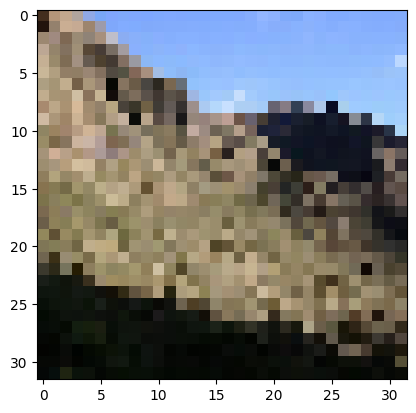

In [57]:
index = np.random.randint(X_train.shape[0])
print(class_names[y_train[index]])
plt.imshow(X_train[index])

In [58]:
X_train

array([[[[225, 225, 225],
         [221, 223, 222],
         [221, 223, 222],
         ...,
         [237, 237, 237],
         [238, 238, 238],
         [240, 240, 240]],

        [[230, 230, 230],
         [227, 227, 227],
         [232, 232, 232],
         ...,
         [244, 244, 244],
         [244, 244, 244],
         [246, 246, 246]],

        [[ 55,  55,  55],
         [223, 223, 223],
         [ 88,  87,  88],
         ...,
         [245, 245, 245],
         [246, 246, 246],
         [246, 246, 246]],

        ...,

        [[114, 112, 111],
         [ 97,  96,  94],
         [125, 123, 124],
         ...,
         [ 90,  89,  87],
         [ 88,  87,  85],
         [ 92,  91,  89]],

        [[153, 152, 150],
         [113, 112, 110],
         [123, 121, 122],
         ...,
         [ 83,  82,  79],
         [ 68,  67,  65],
         [ 80,  79,  77]],

        [[131, 130, 128],
         [133, 132, 130],
         [128, 126, 125],
         ...,
         [128, 127, 125],
        

In [59]:
X_train = X_train/255
X_test = X_test/255

In [60]:
X_train

array([[[[0.88235294, 0.88235294, 0.88235294],
         [0.86666667, 0.8745098 , 0.87058824],
         [0.86666667, 0.8745098 , 0.87058824],
         ...,
         [0.92941176, 0.92941176, 0.92941176],
         [0.93333333, 0.93333333, 0.93333333],
         [0.94117647, 0.94117647, 0.94117647]],

        [[0.90196078, 0.90196078, 0.90196078],
         [0.89019608, 0.89019608, 0.89019608],
         [0.90980392, 0.90980392, 0.90980392],
         ...,
         [0.95686275, 0.95686275, 0.95686275],
         [0.95686275, 0.95686275, 0.95686275],
         [0.96470588, 0.96470588, 0.96470588]],

        [[0.21568627, 0.21568627, 0.21568627],
         [0.8745098 , 0.8745098 , 0.8745098 ],
         [0.34509804, 0.34117647, 0.34509804],
         ...,
         [0.96078431, 0.96078431, 0.96078431],
         [0.96470588, 0.96470588, 0.96470588],
         [0.96470588, 0.96470588, 0.96470588]],

        ...,

        [[0.44705882, 0.43921569, 0.43529412],
         [0.38039216, 0.37647059, 0.36862745]

In [61]:
print(X_train.min())
print(X_train.max())

0.0
1.0


In [62]:
print(X_train.shape)

(14034, 32, 32, 3)


In [64]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3)),
    keras.layers.MaxPooling2D(2,2),
    # keras.layers.Conv2D(32, (3,3)),
    # keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(32),
    keras.layers.Dense(16),
    keras.layers.Dense(6, activation="softmax")
])

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_3 (Dense)             (None, 32)               

In [66]:
64*(3*3)*3 + 64

1792

In [67]:
32*(3*3)*64 + 32

18464

In [69]:
6*6*32 * 32 + 32

36896

In [70]:
32*16 + 16

528

In [72]:
model.compile(optimizer="adam",
              loss= "sparse_categorical_crossentropy",
              metrics= ['accuracy'])

In [75]:
X_train.shape[0]*0.9/128

98.6765625

In [76]:
history = model.fit(X_train,
                    y_train,
                    batch_size = 128,
                    epochs = 20,
                    validation_split = 0.1)

Epoch 1/20


99/99 [==============================] - 7s 52ms/step - loss: 1.1885 - accuracy: 0.5467 - val_loss: 0.9833 - val_accuracy: 0.6189
Epoch 2/20
99/99 [==============================] - 5s 48ms/step - loss: 0.9454 - accuracy: 0.6474 - val_loss: 0.8507 - val_accuracy: 0.6909
Epoch 3/20
99/99 [==============================] - 5s 49ms/step - loss: 0.8660 - accuracy: 0.6796 - val_loss: 0.8377 - val_accuracy: 0.6895
Epoch 4/20
99/99 [==============================] - 6s 57ms/step - loss: 0.8174 - accuracy: 0.6979 - val_loss: 0.8271 - val_accuracy: 0.7066
Epoch 5/20
99/99 [==============================] - 6s 57ms/step - loss: 0.7783 - accuracy: 0.7146 - val_loss: 0.8095 - val_accuracy: 0.6987
Epoch 6/20
99/99 [==============================] - 5s 54ms/step - loss: 0.7517 - accuracy: 0.7241 - val_loss: 0.7627 - val_accuracy: 0.7194
Epoch 7/20
99/99 [==============================] - 5s 55ms/step - loss: 0.7362 - accuracy: 0.7298 - val_loss: 0.7649 - val_accuracy: 0.7094
Epoch 8/20


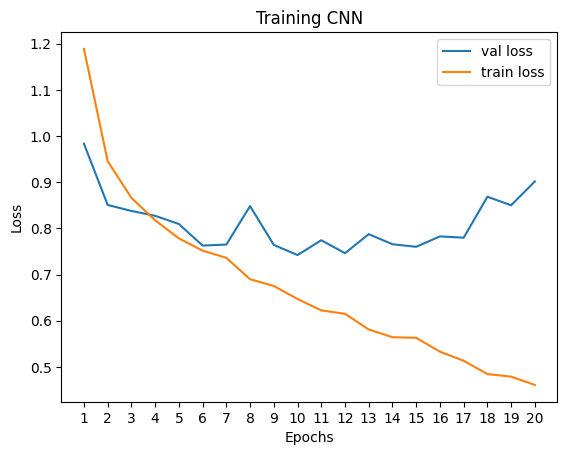

In [78]:
df_hist = pd.DataFrame(history.history, index=np.arange(1,21))
plt.plot(df_hist['val_loss'], label="val loss")
plt.plot(df_hist['loss'], label="train loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training CNN")
plt.xticks(np.arange(1,21))
plt.legend()

In [79]:
results = model.evaluate(X_test, y_test)

94/94 [==============================] - 1s 6ms/step - loss: 0.9292 - accuracy: 0.7073


In [81]:
3000/32

93.75

In [80]:
y_pred = model.predict(X_test)

94/94 [==============================] - 1s 6ms/step


In [82]:
confusion_matrix(y_pred.argmax(axis=1), y_test)

array([[295,  17,  15,  35,  34,  80],
       [ 13, 404,   3,   5,   6,  13],
       [ 10,   3, 444, 108, 119,  15],
       [ 10,   1,  45, 323,  60,   4],
       [ 22,   2,  30,  43, 274,   7],
       [ 87,  47,  16,  11,  17, 382]], dtype=int64)

<Axes: >

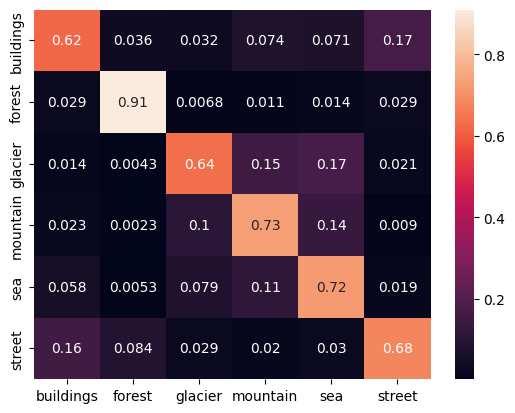

In [83]:
c_mat = confusion_matrix(y_pred.argmax(axis=1), y_test, normalize='true')
sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)

In [84]:
from sklearn.metrics import classification_report

In [89]:
# IMAGE_SIZE = (64,64)

# X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE, class_names_label)
# X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE, class_names_label)

# X_train, y_train = shuffle(X_train, y_train, random_state=42)
# X_test, y_test = shuffle(X_test, y_test, random_state=42)

# X_train = X_train/255
# X_test = X_test/255

# model_2 = keras.Sequential([
#     keras.layers.Conv2D(128, (3,3), input_shape=(64,64,3)),
#     keras.layers.MaxPooling2D(2,2),
#     keras.layers.Conv2D(64, (3,3)),
#     keras.layers.MaxPooling2D(2,2),
#     keras.layers.Conv2D(32, (3,3)),
#     keras.layers.MaxPooling2D(2,2),
#     keras.layers.Flatten(),
#     keras.layers.Dense(64),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(32),
#     keras.layers.Dense(6, activation="softmax")
# ])

# model_2.compile(optimizer="adam",
#               loss= "sparse_categorical_crossentropy",
#               metrics= ['accuracy'])

# history = model_2.fit(X_train,
#                     y_train,
#                     batch_size = 64,
#                     epochs = 20,
#                     validation_split = 0.1)

# df_hist = pd.DataFrame(history.history, index=np.arange(1,21))
# plt.plot(df_hist['val_loss'], label="val loss")
# plt.plot(df_hist['loss'], label="train loss")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training CNN")
# plt.xticks(np.arange(1,21))
# plt.legend()

# results = model_2.evaluate(X_test, y_test)

# y_pred = model_2.predict(X_test)

# c_mat = confusion_matrix(y_pred.argmax(axis=1), y_test, normalize='true')
# sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)

# print(classification_report(y_test, y_pred.argmax(axis=1)))